In [1]:
import numpy as np
import pandas as pd
import time
import os
import pathlib
import copy
from matplotlib import pyplot as plt
from scipy import stats


answer_m1 = pd.read_csv('Answer_m1.csv')
answer_m2 = pd.read_csv('Answer_m2.csv')
answer_m3 = pd.read_csv('Answer_m3.csv')

std =[260,310,400]

_n_hist = 10
_n_samples = 26

In [2]:
def load_data(_n = 0,_n_file = 10,name = 'Predict_Modified_M',start=0) :
    _data = list()
    for i in range(start,_n_file+start) :
        data = pd.read_csv('{}{}_{}.csv'.format(name,_n,i))
        _data.append(data)
    return _data

In [3]:
def dist_euclidean(data = '', answer='',robot='',step='',std = 500) :
    _x = '{}_{}_x'.format(step,robot)
    _y = '{}_{}_y'.format(step,robot)
    ans_x = answer[_x]
    data_x = data[_x]
    dist_x = (ans_x - data_x) * std

    ans_y = answer[_y]
    data_y = data[_y]
    dist_y = (ans_y - data_y) * std

    dist = np.sqrt(np.square(dist_x)+np.square(dist_y))
    average = np.average(dist)
    std = np.std(dist)
    return dist, average, std

In [4]:
def cal_result(data='',robots=['H','F1','F2','F3','F4'],_n_hist = 10,_n_samples=26,std = 0,answer='') :
    _avgs = list()
#    _stds = list()
    for i in range(0,len(data)) :
        _tmp_avgs = list()
#        _tmp_stds = list()
        for j,_robot in enumerate(robots) :
            _tmp_avg = list()
#            _tmp_std = list()
            for step in range(_n_hist, _n_samples) :
                data1,avg1,std1 = dist_euclidean(data=data[i],answer=answer,std=std,
                                      robot=_robot,step=step)
                _tmp_avg.append(avg1)
 #               _tmp_std.append(std1)
            _tmp_avgs.append(_tmp_avg)
 #           _tmp_stds.append(_tmp_std)
        _avgs.append(_tmp_avgs)
 #       _stds.append(_tmp_stds)
 #  return _stds,_avgs
    return np.array(_avgs)

In [5]:
def find_average(data = '',_n_hist = 10,_n_samples=26,type = 0,_n_robot = 5,delete_list=[100,100]) :
    ## data[i][j][k] -> i : Model // j -> Robots(H,F1,F2,F3,F4) // k -> steps
    result = list()
    _avgs = list()
    _stds = list()
    _data = list()
    for i in range(len(data)) :
        if i != delete_list[0] and i != delete_list[1] :
            _data.append(data[i])
    _data = np.array(_data)
    
    if type == 1 :
        for i in range(0,_n_robot) :
            _tmp_avgs = list()
            _tmp_stds = list()
            for j in range(0,_n_samples-_n_hist) :                
                _tmp_avgs.append(np.average(_data[:,i,j])/3)
                _tmp_stds.append(np.std(_data[:,i,j])/3)
        #            print(np.sum(data[:,i,j]))
    #            print(np.average(data[:,i,j]))
    #            _tmp_result.append(_sum/(3*len(data)))
            _avgs.append(_tmp_avgs)
            _stds.append(_tmp_stds)
    elif type == 2 :
        for i in range(0,len(data)) :
            _tmp_avgs = list()
            _tmp_stds = list()
            for j in range(0,_n_robot) :
                _tmp_avgs.append(np.average(data[i,j,:_n_samples-_n_hist-5])/3)
                _tmp_stds.append(np.std(data[i,j,:_n_samples-_n_hist-5])/3)                
            _avgs.append(_tmp_avgs)
            _stds.append(_tmp_stds)
    return np.array(_avgs),np.array(_stds)

In [6]:
def average_error(avg = '',length = 9) :
    _avgs = list()
    _stds = list()
    _total_avg = 0
    _total_n = 0
    for i in range(len(avg)) :
        _n = length+i
        _total_n += _n
        _avgs.append(np.average(avg[i,:_n]))
        _stds.append(np.std(avg[i,:_n]))
        _total_avg += np.sum(avg[i,:_n])
    _total_avg /= _total_n
    return _avgs,_stds,_total_avg


In [7]:
def temp_method(data='') :
    _tmp = list()
    for i in range(len(data)) :
        _tmp.append(np.average(data[i]))
    _tmp = np.array(_tmp)
#    print('max : {} / min :{}'.format(np.argmax(_tmp),np.argmin(_tmp)))
    _data = list()
    for i in range(len(data)) :
        if np.argmax(_tmp) != i and np.argmin(_tmp) != i :
            _data.append(data[i])
    
    return np.array(_data),[np.argmax(_tmp),np.argmin(_tmp)]

## Model
* m1 : 1 cue
* m2 : 2 cue
* m2_2 : 2 cue + sametime
* m3 : 3 cue
* m3_2 : 3 cue + nearestonly
* m3_3 : 3 cue + sametime

In [8]:
data_m1 = load_data(_n=1,_n_file=10)
data_m2 = load_data(_n=2,_n_file=10)
#data_m2_2 = load_data(_n='',name='Predict_Modified_M2_sametime')
data_m3 = load_data(_n=3,_n_file=10)
data_m3_2 = load_data(_n='',name='Predict_Modified_M3_nearestonly',_n_file=10)
data_m3_3 = load_data(_n='',name='Predict_Modified_M3_sametime',_n_file=10)

In [9]:
result_m1 = cal_result(data=data_m1,answer = answer_m1,std=std[0],_n_hist = _n_hist,_n_samples=_n_samples)
result_m2 = cal_result(data=data_m2,answer = answer_m2,std=std[1],_n_hist = _n_hist,_n_samples=_n_samples)
#result_m2_2 = cal_result(data=data_m2_2,answer = answer_m2,std=std[1],_n_hist = _n_hist,_n_samples=_n_samples)
result_m3 = cal_result(data=data_m3,answer = answer_m3,std=std[2],_n_hist = _n_hist,_n_samples=_n_samples)
result_m3_2 = cal_result(data=data_m3_2,answer =answer_m3,std=std[2],_n_hist = _n_hist,_n_samples=_n_samples)
result_m3_3 = cal_result(data=data_m3_3,answer = answer_m3,std=std[2],_n_hist = _n_hist,_n_samples=_n_samples)


In [10]:
### Model들 전체 평균 -> H, F1, F2, F3, F4로 : type = 1
avg_m1 ,std_m1= find_average(type = 2, data=result_m1,_n_hist = _n_hist,_n_samples=_n_samples)
avg_m2 ,std_m2= find_average(type = 2,data=result_m2,_n_hist = _n_hist,_n_samples=_n_samples)
#avg_m2_2 ,std_m2_2= find_average(type = 2,data=result_m2_2,_n_hist = _n_hist,_n_samples=_n_samples)
avg_m3 ,std_m3= find_average(type = 2, data=result_m3,_n_hist = _n_hist,_n_samples=_n_samples)
avg_m3_2 ,std_m3_2= find_average(type = 2, data=result_m3_2,_n_hist = _n_hist,_n_samples=_n_samples)
avg_m3_3 ,std_m3_3= find_average(type = 2, data=result_m3_3,_n_hist = _n_hist,_n_samples=_n_samples)

In [11]:
avg_m1_t,delete_list_m1 = temp_method(avg_m1)
avg_m2_t,delete_list_m2 = temp_method(avg_m2)
avg_m3_t,delete_list_m3 = temp_method(avg_m3)
avg_m3_2_t,delete_list_m3_2 = temp_method(avg_m3_2)
avg_m3_3_t,delete_list_m3_3 = temp_method(avg_m3_3)

In [12]:
avg_err_m1,std_err_m1, error_m1 = average_error(avg = avg_m1,length = 11) 
avg_err_m2,std_err_m2, error_m2 = average_error(avg = avg_m2,length = 11) 
#avg_err_m2_2,std_err_m2_2, error_m2_2 = average_error(avg = avg_m2_2,length = 11) 
avg_err_m3,std_err_m3, error_m3 = average_error(avg = avg_m3,length = 11) 
avg_err_m3_2,std_err_m3_2, error_m3_2 = average_error(avg = avg_m3_2,length = 11) 
avg_err_m3_3,std_err_m3_3, error_m3_3 = average_error(avg = avg_m3_3,length = 11) 

In [13]:
### Model들 전체 평균 -> H, F1, F2, F3, F4로 : type = 1
avg_m1_timestep ,std_m1_timestep= find_average(type = 1, data=result_m1,_n_hist = _n_hist,_n_samples=_n_samples,
                                               delete_list=delete_list_m1)
avg_m2_timestep ,std_m2_timestep= find_average(type = 1,data=result_m2,_n_hist = _n_hist,_n_samples=_n_samples,
                                              delete_list=delete_list_m2)
#avg_m2_2_timestep ,std_m2_2_timestep= find_average(type = 1,data=result_m2_2,_n_hist = _n_hist,_n_samples=_n_samples)
avg_m3_timestep ,std_m3_timestep= find_average(type = 1, data=result_m3,_n_hist = _n_hist,_n_samples=_n_samples,
                                              delete_list=delete_list_m3)
avg_m3_2_timestep ,std_m3_2_timestep= find_average(type = 1, data=result_m3_2,_n_hist = _n_hist,_n_samples=_n_samples,
                                                  delete_list=delete_list_m3_2)
avg_m3_3_timestep ,std_m3_3_timestep= find_average(type = 1, data=result_m3_3,_n_hist = _n_hist,_n_samples=_n_samples,
                                                  delete_list=delete_list_m3_3)

# Comparison 1

## P-value

In [14]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2, 3: F3, 4 : F4)
#_n = 0

# _n = pred 로봇 (0 : 3rd Pred, 1 : 2nd Pred , 2 : 1st pred)
_set = [3,2,1]
for _n in range(0,3) :

    #Model_list = [avg_m1_t[:,_n:_n+1],avg_m2_t[:,_n:_n+1],avg_m3_t[:,_n:_n+1]]
    Model_list = [avg_m1_t[:,_n+2:_n+3],avg_m2_t[:,_n+1:_n+2],avg_m3_t[:,_n:_n+1]]

    result = np.array(np.zeros((3,3)))
    for i in range(0,3) :
        for j in range(i,3) :
            _result = stats.ttest_ind(Model_list[i],Model_list[j])
            result[i][j] = "%.5f"%(_result[1])
            result[j][i] = "%.5f"%(_result[1])

    result = pd.DataFrame(result, columns = ['M1','M2','M3'],index=['M1','M2','M3'])
    print('{} prediction'.format(_set[_n]))
    print(result)
    print('----')

3 prediction
         M1       M2       M3
M1  1.00000  0.56006  0.00004
M2  0.56006  1.00000  0.00015
M3  0.00004  0.00015  1.00000
----
2 prediction
         M1       M2       M3
M1  1.00000  0.46289  0.00026
M2  0.46289  1.00000  0.00605
M3  0.00026  0.00605  1.00000
----
1 prediction
         M1       M2   M3
M1  1.00000  0.01347  0.0
M2  0.01347  1.00000  0.0
M3  0.00000  0.00000  1.0
----


In [28]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2, 3: F3, 4 : F4)
#_n = 0
_set = ['H','F1','F2']
for _n in range(0,3) :

    #Model_list = [avg_m1_t[:,_n:_n+1],avg_m2_t[:,_n:_n+1],avg_m3_t[:,_n:_n+1]]
    Model_list = [avg_m1_t[:,_n:_n+1],avg_m2_t[:,_n:_n+1],avg_m3_t[:,_n:_n+1]]

    result = np.array(np.zeros((3,3)))
    for i in range(0,3) :
        for j in range(i,3) :
            _result = stats.ttest_ind(Model_list[i],Model_list[j])
            result[i][j] = "%.5f"%(_result[1])
            result[j][i] = "%.5f"%(_result[1])

    result = pd.DataFrame(result, columns = ['M1','M2','M3'],index=['M1','M2','M3'])
    print('{} prediction'.format(_set[_n]))
    print(result)
    print('----')

H prediction
         M1       M2       M3
M1  1.00000  0.00430  0.00003
M2  0.00430  1.00000  0.01889
M3  0.00003  0.01889  1.00000
----
F1 prediction
         M1       M2       M3
M1  1.00000  0.00008  0.00000
M2  0.00008  1.00000  0.00072
M3  0.00000  0.00072  1.00000
----
F2 prediction
         M1       M2       M3
M1  1.00000  0.00002  0.00000
M2  0.00002  1.00000  0.00002
M3  0.00000  0.00002  1.00000
----


In [123]:
# _n = pred 로봇 (0 : 3rd Pred, 1 : 2nd Pred , 2 : 1st pred)
_n = 1
A = avg_m1_t[:,_n+2:_n+3]
B = avg_m2_t[:,_n+1:_n+2]
C = avg_m3_t[:,_n:_n+1]
result = stats.ttest_ind(A,B)
print("A vs B : t검정 통계량: %.3f, pvalue=%.3f"%(result))
result = stats.ttest_ind(A,C)
print("A vs C : t검정 통계량: %.3f, pvalue=%.3f"%(result))
result = stats.ttest_ind(B,C)
print("B vs C : t검정 통계량: %.3f, pvalue=%.3f"%(result))

A vs B : t검정 통계량: -2.437, pvalue=0.041
A vs C : t검정 통계량: -3.975, pvalue=0.004
B vs C : t검정 통계량: -1.389, pvalue=0.202


In [124]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2)
_n = 0
A = avg_m1_t[:,_n:_n+1]
B = avg_m2_t[:,_n:_n+1]
C = avg_m3_t[:,_n:_n+1]
result = stats.ttest_ind(A,B)
print("A vs B : t검정 통계량: %.3f, pvalue=%.3f"%(result))
result = stats.ttest_ind(A,C)
print("A vs C : t검정 통계량: %.3f, pvalue=%.3f"%(result))
result = stats.ttest_ind(B,C)
print("B vs C : t검정 통계량: %.3f, pvalue=%.3f"%(result))

A vs B : t검정 통계량: 3.939, pvalue=0.004
A vs C : t검정 통계량: 8.462, pvalue=0.000
B vs C : t검정 통계량: 2.934, pvalue=0.019


# Slope


In [125]:
_n_steps = 8
_t_robot = ['H','F1','F2']
for i in range(0,3) :
    print(_t_robot[i])
    print('M1 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m1_timestep[i][0],
                                                                    _n_steps+i,
                                                                    avg_m1_timestep[i][_n_steps+i],
                                                                    avg_m1_timestep[i][_n_steps+i]-avg_m1_timestep[i][0],
                                                                    (avg_m1_timestep[i][_n_steps+i]-avg_m1_timestep[i][0])/(_n_steps+i+1)))
    print('M2 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m2_timestep[i][0],
                                                                _n_steps+i,
                                                                avg_m2_timestep[i][_n_steps+i],
                                                                avg_m2_timestep[i][_n_steps+i]-avg_m2_timestep[i][0],
                                                                (avg_m2_timestep[i][_n_steps+i]-avg_m2_timestep[i][0])/(_n_steps+i+1)))
    print('M3 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m3_timestep[i][0],
                                                            _n_steps+i,
                                                            avg_m3_timestep[i][_n_steps+i],
                                                            avg_m3_timestep[i][_n_steps+i]-avg_m3_timestep[i][0],
                                                            (avg_m3_timestep[i][_n_steps+i]-avg_m3_timestep[i][0])/(_n_steps+i+1)))
    print('------------')

H
M1 = 0 : 1.9448128853355113  // 8 : 22.990734775983142 // dist = 21.04592189064763, slope = 2.3384357656275143
M2 = 0 : 2.7908293376550137  // 8 : 20.718416554958544 // dist = 17.927587217303532, slope = 1.991954135255948
M3 = 0 : 3.2124299939864596  // 8 : 18.625493829306645 // dist = 15.413063835320186, slope = 1.7125626483689096
------------
F1
M1 = 0 : 1.8592068143141567  // 9 : 22.889345350682778 // dist = 21.03013853636862, slope = 2.1030138536368623
M2 = 0 : 2.508217777530648  // 9 : 19.105891687476074 // dist = 16.597673909945428, slope = 1.6597673909945427
M3 = 0 : 2.8120658689783173  // 9 : 15.859991082277448 // dist = 13.04792521329913, slope = 1.304792521329913
------------
F2
M1 = 0 : 1.7978296055810896  // 10 : 20.584044520483577 // dist = 18.786214914902487, slope = 1.7078377195365897
M2 = 0 : 2.5683560820601192  // 10 : 16.61521535416907 // dist = 14.04685927210895, slope = 1.2769872065553591
M3 = 0 : 2.835819510301006  // 10 : 12.190354578272666 // dist = 9.354535067

# Bar

In [14]:
Avg_Compare = list()
Std_Compare = list()
for i in range(2,-1,-1) :
#    Avg_Compare.append([np.average(avg_m1[:,4-i:5-i]),np.average(avg_m2[:,3-i:4-i]),np.average(avg_m3[:,2-i:3-i])])
#    Std_Compare.append([np.std(avg_m1[:,4-i:5-i]),np.std(avg_m2[:,3-i:4-i]),np.std(avg_m3[:,2-i:3-i])])
    Avg_Compare.append([np.average(avg_m1_t[:,i:i+1]),np.average(avg_m2_t[:,i:i+1]),np.average(avg_m3_t[:,i:i+1])])
    Std_Compare.append([np.std(avg_m1_t[:,i:i+1]),np.std(avg_m2_t[:,i:i+1]),np.std(avg_m3_t[:,i:i+1])])

Text(0.5, 0, 'Target Robot')

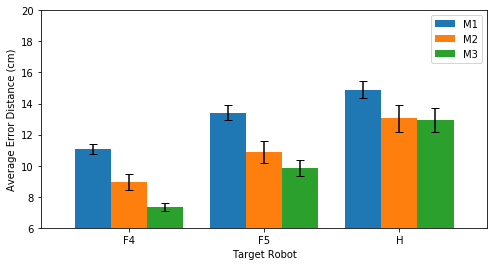

In [15]:
#_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
#_x_std = pd.DataFrame(Std_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['F4','F5','H'])
_x_std = pd.DataFrame(Std_Compare,columns = ['M1','M2','M3'],index =['F4','F5','H'])

ax1 = _x.plot(kind='bar',yerr=_x_std,capsize=4, rot=0,width=0.8, ylim=(6,20),figsize=(8,4))
ax1.set_ylabel('Average Error Distance (cm)')
ax1.set_xlabel('Target Robot')


In [16]:
print(_x)

           M1         M2         M3
F4  11.079715   8.956960   7.335915
F5  13.413301  10.902846   9.868515
H   14.898473  13.052844  12.926158


In [18]:
a = [11.138201, 9.306729, 7.301042]
b = [1.93, 2.15, 2.64]
for i in range(3,6) :
    Avg_Compare.append([a[0]+b[0]*i,a[1]+b[1]*i,a[2]+b[2]*i])

Text(0.5, 0, 'Robot(Remote from T)')

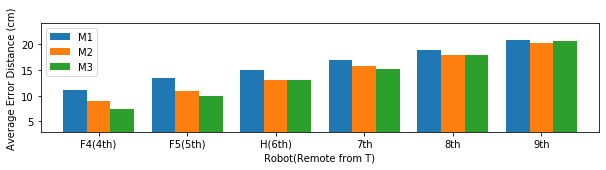

In [19]:
_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['F4(4th)','F5(5th)','H(6th)','7th','8th','9th'])

ax1 = _x.plot(kind='bar', rot=0,width=0.8, ylim=(3,24),figsize=(10,2))
ax1.set_ylabel('Average Error Distance (cm)')
ax1.set_xlabel('Robot(Remote from T)')


In [53]:
print(_x)

                M1         M2         M3
F2(4th)  11.138201   9.306729   7.301042
F1(5th)  13.512781  11.366787   9.683678
H(6th)   14.997858  13.605302  12.598175
7th      16.928201  15.756729  15.221042
8th      18.858201  17.906729  17.861042
9th      20.788201  20.056729  20.501042


In [15]:
Avg_Compare = list()
Std_Compare = list()
for i in range(2,0,-1) :
#    Avg_Compare.append([np.average(avg_m1[:,4-i:5-i]),np.average(avg_m2[:,3-i:4-i]),np.average(avg_m3[:,2-i:3-i])])
#    Std_Compare.append([np.std(avg_m1[:,4-i:5-i]),np.std(avg_m2[:,3-i:4-i]),np.std(avg_m3[:,2-i:3-i])])
    Avg_Compare.append([np.average(avg_m1_t[:,i+2:i+3]),np.average(avg_m2_t[:,i+1:i+2]),np.average(avg_m3_t[:,i:i+1])])
    Std_Compare.append([np.std(avg_m1_t[:,i+2:i+3]),np.std(avg_m2_t[:,i+1:i+2]),np.std(avg_m3_t[:,i:i+1])])

Text(0, 0.5, 'Average Error Distance (cm)')

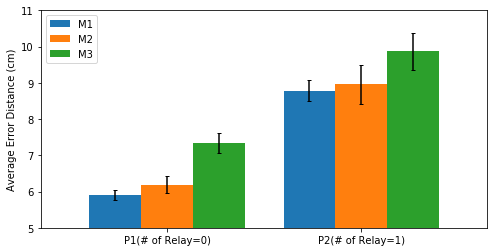

In [17]:
#_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
#_x_std = pd.DataFrame(Std_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['P1(# of Relay=0)','P2(# of Relay=1)'])
_x_std = pd.DataFrame(Std_Compare,columns = ['M1','M2','M3'],index =['P1(# of Relay=0)','P2(# of Relay=1)'])

ax1 = _x.plot(kind='bar',yerr=_x_std,capsize=2, rot=0,width=0.8, ylim=(5,11),figsize=(8,4))
ax1.set_ylabel('Average Error Distance (cm)')


In [19]:
print(_x)

                          M1        M2        M3
1st(# of Relay=0)   5.903098  6.194259  7.335915
2nd (# of Relay=1)  8.782072  8.956960  9.868515


# Graph

## Robots

ValueError: shape mismatch: objects cannot be broadcast to a single shape

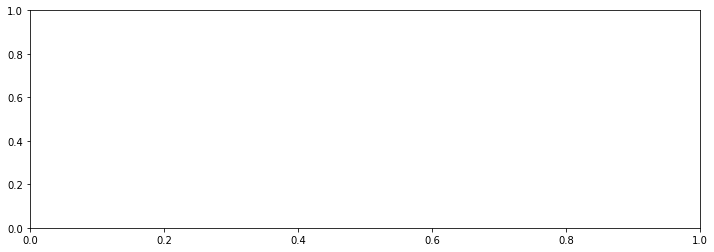

In [29]:
x = list()
length = len(avg_m1_timestep[0])
for i in range(0,length) :
    x.append(i)

title = ['H','F1','F2','F3']
_num = 0
_minus = 3

fig, ax1 = plt.subplots(nrows=1,ncols=1, sharey=False, figsize=(12, 4))

ax1 = plt.errorbar(x[:length-_minus+_num],avg_m1_timestep[_num,:length-_minus+_num-2],std_m1_timestep[_num,:length-_minus+_num-2],
                fmt="o-",capsize=3,label = 'H(M1)')
ax1 = plt.errorbar(x[:length-_minus+_num],avg_m2_timestep[_num,:length-_minus+_num-2],std_m2_timestep[_num,:length-_minus+_num-2],
                fmt="o-",capsize=3,label = 'H(M2)')
#plt.errorbar(x[:length-_minus+_num-1],avg_m2_2[_num,:length-_minus+_num-1],std_m2_2[_num,:length-_minus+_num-1],
#                fmt="o-",capsize=3,label = 'M2_2')
ax1 = plt.errorbar(x[:length-_minus-2+_num],avg_m3_timestep[_num,:length-_minus-2+_num],std_m3_timestep[_num,:length-_minus-2+_num],
                fmt="o-",capsize=3,label = 'H(M3)')
#plt.errorbar(x[:length-_minus+_num],avg_m3_2[_num,:length-_minus+_num],std_m3_2[_num,:length-_minus+_num],
#                fmt="o-",capsize=3,label = 'M3_2')
#plt.errorbar(x[:length-_minus+_num],avg_m3_3[_num,:length-_minus+_num],std_m3_3[_num,:length-_minus+_num],
#                fmt="o-",capsize=3,label = 'M3_3')





ax1 = plt.ylim([0,32])
ax1 = plt.xticks(x[:length-_minus-2+_num])
ax1 = plt.ylabel('Average Error Distance (cm)')
ax1 = plt.xlabel('Time step (0.5 sec)')
ax1 = plt.legend()
plt.show()

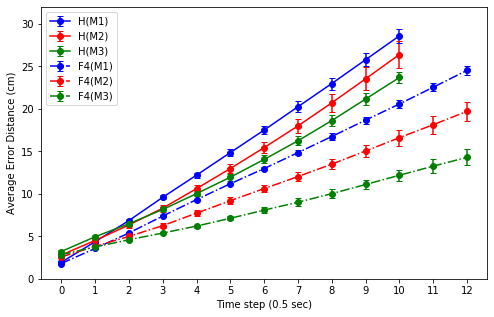

In [61]:
x = list()
length = len(avg_m1_timestep[0])
for i in range(0,length) :
    x.append(i)

title = ['H','F1','F2','F3']
_num = 0
_minus = 3

fig, ax1 = plt.subplots(nrows=1,ncols=1, sharey=False, figsize=(8, 5))

ax1 = plt.errorbar(x[:length-_minus+_num-2],avg_m1_timestep[_num,:length-_minus+_num-2],std_m1_timestep[_num,:length-_minus+_num-2],
                fmt="bo-",capsize=3,label = 'H(M1)')
ax1 = plt.errorbar(x[:length-_minus+_num-2],avg_m2_timestep[_num,:length-_minus+_num-2],std_m2_timestep[_num,:length-_minus+_num-2],
                fmt="ro-",capsize=3,label = 'H(M2)')
#plt.errorbar(x[:length-_minus+_num-1],avg_m2_2[_num,:length-_minus+_num-1],std_m2_2[_num,:length-_minus+_num-1],
#                fmt="o-",capsize=3,label = 'M2_2')
ax1 = plt.errorbar(x[:length-_minus-2+_num],avg_m3_timestep[_num,:length-_minus-2+_num],std_m3_timestep[_num,:length-_minus-2+_num],
                fmt="go-",capsize=3,label = 'H(M3)')
#plt.errorbar(x[:length-_minus+_num],avg_m3_2[_num,:length-_minus+_num],std_m3_2[_num,:length-_minus+_num],
#                fmt="o-",capsize=3,label = 'M3_2')
#plt.errorbar(x[:length-_minus+_num],avg_m3_3[_num,:length-_minus+_num],std_m3_3[_num,:length-_minus+_num],
#                fmt="o-",capsize=3,label = 'M3_3')

_num = 2
ax1 = plt.errorbar(x[:length-_minus+_num-2],avg_m1_timestep[_num,:length-_minus+_num-2],std_m1_timestep[_num,:length-_minus+_num-2],
                fmt="bo-.",capsize=3,label = 'F4(M1)')
ax1 = plt.errorbar(x[:length-_minus+_num-2],avg_m2_timestep[_num,:length-_minus+_num-2],std_m2_timestep[_num,:length-_minus+_num-2],
                fmt="ro-.",capsize=3,label = 'F4(M2)')
ax1 = plt.errorbar(x[:length-_minus-2+_num],avg_m3_timestep[_num,:length-_minus-2+_num],std_m3_timestep[_num,:length-_minus-2+_num],
                fmt="go-.",capsize=3,label = 'F4(M3)')





ax1 = plt.ylim([0,32])
ax1 = plt.xticks(x[:length-_minus-2+_num])
ax1 = plt.ylabel('Average Error Distance (cm)')
ax1 = plt.xlabel('Time step (0.5 sec)')
ax1 = plt.legend()
plt.show()

In [23]:
_n = 2
print(avg_m1_timestep[_n][10])
print(avg_m2_timestep[_n][10])
print(avg_m3_timestep[_n][10])
print(avg_m1_timestep[_n][10]-avg_m3_timestep[_n][10])


20.584044520483577
16.61521535416907
12.190354578272666
8.39368994221091


## Relay (P1)

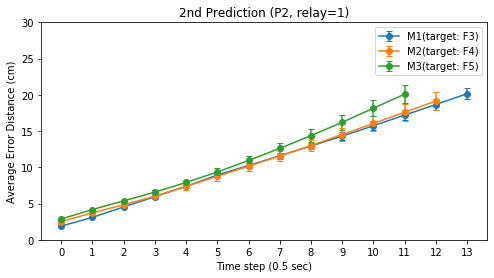

In [22]:
x = list()
length = len(avg_m1_timestep[0])
for i in range(0,length) :
    x.append(i)
    
title = ['3rd Prediction (P3, relay=2)','2nd Prediction (P2, relay=1)','1st Prediction (P1, relay=0)']
_num = 1
_minus = 3 
_robot = ['H','F5','F4','F3','F2']

fig, ax1 = plt.subplots(nrows=1,ncols=1, sharey=False, figsize=(8, 4))

plt.errorbar(x[:length-_minus+_num],avg_m1_timestep[_num+2,:length-_minus+_num],std_m1_timestep[_num+2,:length-_minus+_num],
                fmt="o-",capsize=3,label = 'M1(target: {})'.format(_robot[_num+2]))
plt.errorbar(x[:length-_minus+_num-1],avg_m2_timestep[_num+1,:length-_minus+_num-1],std_m2_timestep[_num+1,:length-_minus+_num-1],
                fmt="o-",capsize=3,label = 'M2(target: {})'.format(_robot[_num+1]))
plt.errorbar(x[:length-_minus+_num-2],avg_m3_timestep[_num,:length-_minus+_num-2],std_m3_timestep[_num,:length-_minus+_num-2],
                fmt="o-",capsize=3,label = 'M3(target: {})'.format(_robot[_num]))
#for i in range(0,len(avg_h12)) :
#    plt.errorbar(x[:len(avg_h12[0])-5+i],avg_h12[i,:len(avg_h12[0])-5+i],std_h12[i,:len(avg_h12[0])-5+i],
#                 fmt="o-",capsize=3,label = '{}'.format(i))

plt.ylim([0,30])
plt.xticks(x[:length-_minus+_num])
plt.ylabel('Average Error Distance (cm)')
plt.xlabel('Time step (0.5 sec)')
plt.title('{}'.format(title[_num]))
plt.legend()
plt.show()

In [34]:
print(avg_m1_timestep[_num+2,:length-_minus+_num])
print(avg_m2_timestep[_num+1,:length-_minus+_num-1])
print(avg_m3_timestep[_num,:length-_minus+_num-2])


[ 1.56309904  2.60434837  3.46088511  4.24480607  5.01593552  5.86355067
  6.74782398  7.71248832  8.56981255  9.29951204 10.10322621 11.00153732
 11.96231749 12.93758413 13.89487823]
[ 2.10267725  2.84780733  3.71946075  4.44073991  5.26304384  6.30306518
  7.05300803  7.94901789  8.91648655  9.84774924 10.86165349 11.83064654
 12.74996192 13.65265565]
[ 2.83581951  3.74220906  4.59523824  5.38787106  6.20803937  7.12277033
  8.08595305  9.01456971 10.02399575 11.10464014 12.19035458 13.26428982
 14.29753845]


In [32]:
print(2.83581951-1.56309904)
print(14.29753845-11.96231749)

0.800
0.819
0.881

1.2727204699999999
2.335220959999999


# Comparison 2

# P-value

In [69]:
# _n = 로봇 (0 : H, 1 : F1 , 2 : F2, 3: F3, 4 : F4)
#_n = 0
_set = ['H','F1','F2']
for _n in range(0,3) :

    #Model_list = [avg_m1_t[:,_n:_n+1],avg_m2_t[:,_n:_n+1],avg_m3_t[:,_n:_n+1]]
    Model_list = [avg_m3_t[:,_n:_n+1],avg_m3_2_t[:,_n:_n+1],avg_m3_3_t[:,_n:_n+1]]

    result = np.array(np.zeros((3,3)))
    for i in range(0,3) :
        for j in range(i,3) :
            _result = stats.ttest_ind(Model_list[i],Model_list[j])
            result[i][j] = "%.5f"%(_result[1])
            result[j][i] = "%.5f"%(_result[1])

    result = pd.DataFrame(result, columns = ['M3','M3_2','M3_3'],index=['M3','M3_2','M3_3'])
    print('{} prediction'.format(_set[_n]))
    print(result)
    print('----')

H prediction
           M3     M3_2     M3_3
M3    1.00000  0.01251  0.11643
M3_2  0.01251  1.00000  0.00320
M3_3  0.11643  0.00320  1.00000
----
F1 prediction
           M3     M3_2     M3_3
M3    1.00000  0.02316  0.20722
M3_2  0.02316  1.00000  0.00502
M3_3  0.20722  0.00502  1.00000
----
F2 prediction
           M3     M3_2     M3_3
M3    1.00000  0.00785  0.44355
M3_2  0.00785  1.00000  0.02123
M3_3  0.44355  0.02123  1.00000
----


0.126 -> 0.232 -> 0.476

# Bar

In [30]:
Avg_Compare = list()
Std_Compare = list()
for i in range(2,-1,-1) :
#    Avg_Compare.append([np.average(avg_m1[:,4-i:5-i]),np.average(avg_m2[:,3-i:4-i]),np.average(avg_m3[:,2-i:3-i])])
#    Std_Compare.append([np.std(avg_m1[:,4-i:5-i]),np.std(avg_m2[:,3-i:4-i]),np.std(avg_m3[:,2-i:3-i])])
    Avg_Compare.append([np.average(avg_m3_t[:,i:i+1]),np.average(avg_m3_2_t[:,i:i+1]),np.average(avg_m3_3_t[:,i:i+1])])
    Std_Compare.append([np.std(avg_m3_t[:,i:i+1]),np.std(avg_m3_2_t[:,i:i+1]),np.std(avg_m3_3_t[:,i:i+1])])

Text(0.5, 0, 'Target Robot')

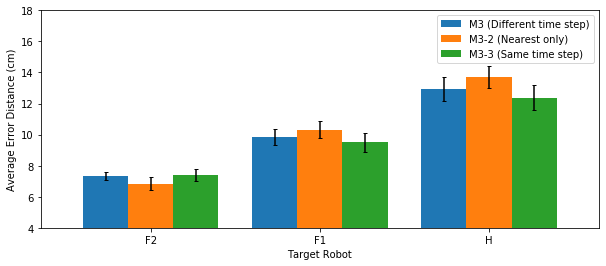

In [31]:
#_x = pd.DataFrame(Avg_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
#_x_std = pd.DataFrame(Std_Compare,columns = ['M1','M2','M3'],index =['P1','P2','P3'])
_x = pd.DataFrame(Avg_Compare,columns = ['M3 (Different time step)','M3-2 (Nearest only)','M3-3 (Same time step)'],index =['F2','F1','H'])
_x_std = pd.DataFrame(Std_Compare,columns = ['M3 (Different time step)','M3-2 (Nearest only)','M3-3 (Same time step)'],index =['F2','F1','H'])

ax1 = _x.plot(kind='bar',yerr=_x_std,capsize=2, rot=0,width=0.8, ylim=(4,18),figsize=(10,4))
ax1.set_ylabel('Average Error Distance (cm)')
ax1.set_xlabel('Target Robot')


In [32]:
print(_x)

    M3 (Different time step)  M3-2 (Nearest only)  M3-3 (Same time step)
F2                  7.335915             6.822850               7.384242
F1                  9.868515            10.320293               9.518625
H                  12.926158            13.709902              12.372303


# Graph

## Robots

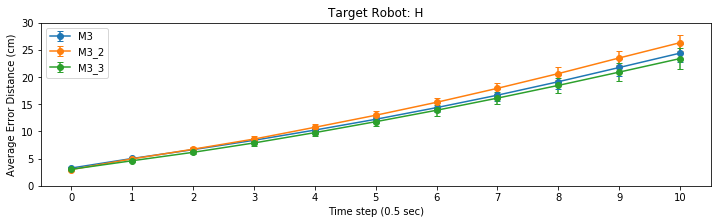

In [21]:
x = list()
length = len(avg_m1_timestep[0])
for i in range(0,length) :
    x.append(i)

title = ['H','F1','F2']
_num = 0
_minus = 3
fig, ax1 = plt.subplots(nrows=1,ncols=1, sharey=False, figsize=(12, 3))

#plt.errorbar(x[:length-_minus+_num-2],avg_m3_timestep[_num,:length-_minus+_num-2],std_m1_timestep[_num,:length-_minus+_num-2],
#                fmt="o-",capsize=3,label = 'M1')
#plt.errorbar(x[:length-_minus+_num-2],avg_m2_timestep[_num,:length-_minus+_num-2],std_m2_timestep[_num,:length-_minus+_num-2],
#                fmt="o-",capsize=3,label = 'M2')
#plt.errorbar(x[:length-_minus+_num-1],avg_m2_2[_num,:length-_minus+_num-1],std_m2_2[_num,:length-_minus+_num-1],
#                fmt="o-",capsize=3,label = 'M2_2')
plt.errorbar(x[:length-_minus-2+_num],avg_m3_timestep[_num,:length-_minus-2+_num],std_m3_timestep[_num,:length-_minus-2+_num],
                fmt="o-",capsize=3,label = 'M3')
plt.errorbar(x[:length-_minus+_num-2],avg_m3_2_timestep[_num,:length-_minus+_num-2],std_m3_2_timestep[_num,:length-_minus+_num-2],
                fmt="o-",capsize=3,label = 'M3_2')
plt.errorbar(x[:length-_minus+_num-2],avg_m3_3_timestep[_num,:length-_minus+_num-2],std_m3_3_timestep[_num,:length-_minus+_num-2],
                fmt="o-",capsize=3,label = 'M3_3')
plt.ylim([0,30])
plt.xticks(x[:length-_minus+_num-2])
plt.ylabel('Average Error Distance (cm)')
plt.xlabel('Time step (0.5 sec)')
plt.title('Target Robot: {}'.format(title[_num]))
plt.legend()
plt.show()

In [44]:
_n = 2
_n_timestep=10
print(avg_m3_timestep[_n][_n_timestep])
#print(avg_m3_2_timestep[_n][_n_timestep])
print(avg_m3_3_timestep[_n][_n_timestep])
#print(avg_m3_2_timestep[_n][_n_timestep]-avg_m3_timestep[_n][_n_timestep])
print(avg_m3_timestep[_n][_n_timestep]-avg_m3_3_timestep[_n][_n_timestep])
#print('slope')
#print((avg_m3_timestep[_n][_n_timestep]-avg_m3_timestep[_n][0])/_n_timestep)
#print((avg_m3_timestep[_n][_n_timestep]-avg_m3_timestep[_n][0])/_n_timestep)
#print((avg_m3_timestep[_n][_n_timestep]-avg_m3_timestep[_n][0])/_n_timestep)

12.290255592510414
12.348736918269893
-0.05848132575947851


# Slopes

In [87]:
_n_steps = 10
_t_robot = ['H','F1','F2']
for i in range(0,3) :
    print(_t_robot[i])
    print('M3 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m3_timestep[i][0],
                                                                    _n_steps+i,
                                                                    avg_m3_timestep[i][_n_steps+i],
                                                                    avg_m3_timestep[i][_n_steps+i]-avg_m3_timestep[i][0],
                                                                    (avg_m3_timestep[i][_n_steps+i]-avg_m3_timestep[i][0])/(_n_steps+i+1)))
    print('M3_2 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m3_2_timestep[i][0],
                                                                _n_steps+i,
                                                                avg_m3_2_timestep[i][_n_steps+i],
                                                                avg_m3_2_timestep[i][_n_steps+i]-avg_m3_2_timestep[i][0],
                                                                (avg_m3_2_timestep[i][_n_steps+i]-avg_m3_2_timestep[i][0])/(_n_steps+i+1)))
    print('M3_3 = 0 : {}  // {} : {} // dist = {}, slope = {}'.format(avg_m3_3_timestep[i][0],
                                                            _n_steps+i,
                                                            avg_m3_3_timestep[i][_n_steps+i],
                                                            avg_m3_3_timestep[i][_n_steps+i]-avg_m3_3_timestep[i][0],
                                                            (avg_m3_3_timestep[i][_n_steps+i]-avg_m3_3_timestep[i][0])/(_n_steps+i+1)))
    print('------------')

H
M3 = 0 : 3.2124299939864596  // 10 : 23.70130917021648 // dist = 20.48887917623002, slope = 1.8626253796572747
M3_2 = 0 : 2.9357481246777297  // 10 : 26.56452596457569 // dist = 23.62877783989796, slope = 2.1480707127179963
M3_3 = 0 : 3.094872650666319  // 10 : 22.306156382471766 // dist = 19.211283731805448, slope = 1.7464803392550408
------------
F1
M3 = 0 : 2.8120658689783173  // 11 : 19.60166549377831 // dist = 16.78959962479999, slope = 1.3991333020666659
M3_2 = 0 : 2.566691346112543  // 11 : 21.441234759914277 // dist = 18.874543413801735, slope = 1.5728786178168113
M3_3 = 0 : 2.723587515487574  // 11 : 18.496524073242707 // dist = 15.772936557755132, slope = 1.3144113798129278
------------
F2
M3 = 0 : 2.835819510301006  // 12 : 14.297538449743394 // dist = 11.461718939442388, slope = 0.8816706876494145
M3_2 = 0 : 2.2817155530348026  // 12 : 14.056059847782699 // dist = 11.774344294747896, slope = 0.9057187919036843
M3_3 = 0 : 2.7793352639825097  // 12 : 13.823217116771465 // d

In [88]:
print(1.39-1.86)

-0.4700000000000002


## Draw Error bar

In [ ]:
_x_avg = list()
_x_std = list()
for i in range(0,5) :
    _x_tmp = [np.average(avg_h12_t2[:,i]),
             np.average(avg_h10_t2[:,i]),
             np.average(avg_h8_t2[:,i]),
             np.average(avg_h6_t2[:,i]),
             np.average(avg_h4_t2[:,i]),
             np.average(avg_h2_t2[:,i])]
    _x_tmp_std = [np.std(avg_h12_t2[:,i]),
             np.std(avg_h10_t2[:,i]),
             np.std(avg_h8_t2[:,i]),
             np.std(avg_h6_t2[:,i]),
             np.std(avg_h4_t2[:,i]),
             np.std(avg_h2_t2[:,i])]
    _x_avg.append(_x_tmp)
    _x_std.append(_x_tmp_std)


In [ ]:
_x = pd.DataFrame(_x_avg,columns = ['12','10','8','6','4','2'],index =['H','F1','F2','F3','F4'])
_x_std = pd.DataFrame(_x_std,columns = ['12','10','8','6','4','2'],index =['H','F1','F2','F3','F4'])
_x.plot(kind='bar',yerr=_x_std,capsize=1)

### Total average error

In [ ]:
def total_error(data='',length = 9) :
    _sums = list()
    for i in range(len(data)) :
        _sum = 0
#        _n = 0
        for j in range(len(data[i])) :
            _sum += data[i][j]*length
#            _n += j
        _sum /= length*len(data)
        _sums.append(_sum)
    return _sums, np.average(_sums), np.std(_sums)

In [ ]:
print(_x)

In [ ]:
print(avg_h12_t2)

In [ ]:
_err_h12,_err_avg_h12,_err_std_h12 = total_error(data=avg_h12_t2,length=9)
_err_h10,_err_avg_h10,_err_std_h10 = total_error(data=avg_h10_t2,length=9)
_err_h8,_err_avg_h8,_err_std_h8 = total_error(data=avg_h8_t2,length=9)
_err_h6,_err_avg_h6,_err_std_h6 = total_error(data=avg_h6_t2,length=9)
_err_h4,_err_avg_h4,_err_std_h4 = total_error(data=avg_h4_t2,length=9)
_err_h2,_err_avg_h2,_err_std_h2 = total_error(data=avg_h2_t2,length=9)

In [ ]:
print(_err_avg_h12)
print(_err_avg_h10)
print(_err_avg_h8)
print(_err_avg_h6)
print(_err_avg_h4)
print(_err_avg_h2)

In [ ]:
y = [_err_avg_h2,_err_avg_h4, _err_avg_h6, _err_avg_h8, _err_avg_h10, _err_avg_h12]
y_std = [_err_std_h2,_err_std_h4, _err_std_h6, _err_std_h8, _err_std_h10, _err_std_h12]
plt.bar(('2','4','6','8','10','12'),y,yerr=y_std,capsize=3)
plt.show()

In [ ]:
print(avg_err_h12)
print(avg_err_h10)
print(avg_err_h8)
print(avg_err_h6)
print(avg_err_h4)
print(avg_err_h2)

## Orientation(방향)


In [9]:
def orientation_error(data ='',answer='',robot='',step='') :
    _o = '{}_{}_o'.format(step,robot)
    ans_o = answer[_o]
    data_o = data[_o]
    _error = np.abs(ans_o - data_o)*180
    avg_error = np.average(_error)
    std_error = np.std(_error)
    return _error, avg_error, std_error


In [10]:
robots = ['H','F1','F2']
_data = [data_m1,data_m2,data_m3]
total = 247
results = list()
for i in range(0,len(_data)) :
    _tmp = list()
    for _robot in robots :
        result = list()
        for step in range(10, 26) :
            _avg = 0
            for j in range(0,len(_data[i])) :
                data1,avg1,std1 = orientation_error(data = _data[i][j], answer = answer_m3, robot = _robot, step = step)
                _avg += avg1
            result.append(_avg/len(_data[i]))
        _tmp.append(result)
    results.append(_tmp)


In [19]:
print(results[0])
print(results[1])
print(results[2])

[[45.211573924983156, 44.993786007371654, 46.446488418161294, 48.32352373917409, 47.166718494973274, 53.79972603622785, 54.302578269874985, 56.2249875459987, 61.579134787705264, 67.07303771871497, 71.49418144295547, 71.41055552136582, 0.0, 0.0, 0.0, 0.0], [9.495204120731984, 12.924001797673844, 13.20490475838481, 12.981011337981215, 14.635923107499789, 18.103557190375703, 17.650406826060404, 19.74151979085814, 21.365529136592713, 25.16339053878867, 31.74761267035142, 76.64172377424583, 75.12457287917182, 0.0, 0.0, 0.0], [12.686055596729556, 18.573898047917346, 21.55159196047352, 21.249971571600323, 19.378722341107693, 19.632669687528743, 22.39647452842932, 26.338781907306885, 29.94141568168745, 30.78277930041009, 32.24893809476097, 36.38017298561943, 82.54067386573928, 83.02825639115417, 0.0, 0.0]]
[[16.251926381558384, 23.635543352521104, 28.74140355735789, 34.78378626963645, 40.01068612280486, 48.20356408836923, 51.532781226526325, 55.02695491408032, 60.74020480840001, 66.92649401914

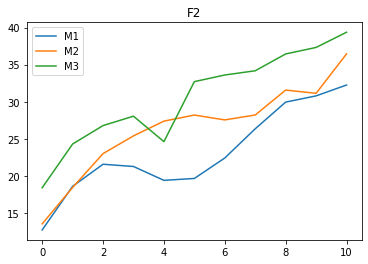

In [21]:
_n = 2
_title = ['H','F1','F2']
plt.plot(results[0][_n][:11],label = 'M1')
plt.plot(results[1][_n][:11],label = 'M2')
plt.plot(results[2][_n][:11],label = 'M3')

plt.title(_title[_n])
plt.legend()
plt.show()

## ETC

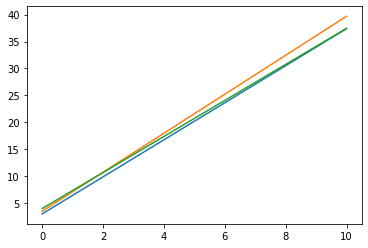

In [104]:
slope = [3.44,3.62,3.345]
_model = [[3],[3.5],[4]]
_m = [3,3.5,4]
for i in range(10) :
    for j,slopes in enumerate(slope) :
        _m[j] += slopes
        _model[j].append(_m[j])

for i in range(0,3) :
    plt.plot(_model[i])

    
